# Space debris Data analysis with Pandas

This notebook shows how to incorporate a large number of data in Python with Pandas. For this example we will use Space debris data. The data is obtained from TLE (Two line element set), a data format encoding a list of orbital elements of an Earth-orbiting object for a given point in time, the epoch; available from https://www.space-track.org

As usual we need to initailize with importing useful python packages.

In [21]:
import numpy as np
import pandas as pd
import sys
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('ggplot')

#import seaborn; seaborn.set()


%matplotlib inline

one can check the version of Python and Pandas as well 

In [22]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.5.1 |Anaconda 4.0.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.18.0


Now, we will locate the TLE data saved as .csv format to be treated in Pandas for further analyses.

In [23]:
# locate the respective *.csv file
location0 = r'.../TLE_FULL.csv'
location1 = r'.../COSMOS.csv'
location2 = r'.../IRIDIUM.csv'
location3 = r'.../FENGYUN.csv'
location4 = r'.../BREEZE-M.csv'

# Function to read the *.csv file
def read(loc):
    return pd.read_csv(loc, sep=";",header = None)

In [24]:
# store the values  
ALL_data = read(location0)
COSMOS_data = read(location1)
IRIDIUM_data = read(location2)
FENGYUN_data = read(location3)
BREEZE_M_data = read(location4)

This brings us the our first problem. Now we will try to see all the data available within the file and then to decide what we need to scrap for our analyses.

In [25]:
# Select any of the loaded data to check
ALL_data

,0,1,2,3,4,5,6,7,8
0,1,5U,58002B,16150.91,063337 -,5.000000e-08,0,-14198-4 0,9999
1,2,5,34.2462,105.3954,1847203,1.753814e+02,186.6703,10.84744118,44578
2,1,11U,59001A,16150.91,585748 +,1.970000e-06,0,+92933-4 0,9994
3,2,11,32.8672,208.6623,1468109,1.814489e+02,178.1477,11.85260937,99345
4,1,12U,59001B,16150.88,843087 +,2.600000e-07,0,-54059-5 0,9994
5,2,12,32.9047,126.5581,1668052,2.186555e+02,128.2203,11.4398519,10470
6,1,20U,59007A,16150.94,362808 +,2.110000e-06,0,+83419-4 0,9999
7,2,20,33.349,51.2913,1667942,3.406134e+02,13.7678,11.55181749,59427
8,1,29U,60002B,16150.82,228484 -,2.500000e-07,0,+27345-4 0,9993
9,2,29,48.3798,90.1039,24074,2.214700e+01,338.0477,14.74061507,239


In [26]:
# Check data type of the columns
ALL_data.dtypes

0      int64
1     object
2     object
3     object
4     object
5    float64
6     object
7     object
8      int64
dtype: object

we have seen that we have a database of mixed datatype including int, float, and object. 


In [27]:
# Slice the data according to our need

All_array = ALL_data.values[1::2] 
COSMOS_array = COSMOS_data.values[2::3]
IRIDIUM_array = IRIDIUM_data.values[2::3]
FENGYUN_array = FENGYUN_data.values[2::3]
BREEZE_M_array = BREEZE_M_data.values[2::3]

In [28]:
#array1= raw_array1[1::2]
df_All = pd.DataFrame(All_array)
df_COSMOS = pd.DataFrame(COSMOS_array)
df_IRIDIUM = pd.DataFrame(IRIDIUM_array)
df_FENGYUN = pd.DataFrame(FENGYUN_array)
df_BREEZE_M = pd.DataFrame(BREEZE_M_array)

In [29]:
## Function to convert from TLE to COE (Classical Orbital Elements)
#############################################################################
mu = 398600                             # Standard gravitational parameter for the earth
Re = 6371                               # Earth Radius [km]
def tle2coe(df):
    inc   = list(map(float,df[2]))      # Inclination [deg]
    RAAN  = list(map(float,df[3]))      # Right Ascension of the Ascending Node [deg]
    ecc   = list(map(float,df[4]))      # Eccentricity
    ecc[:] = [x / 1e7 for x in ecc]

    w     = list(map(float,df[5]))      # Argument of periapsis [deg]
    M     = list(map(float,df[6]))      # Mean anomaly [deg]
    n     = list(map(float,df[7]))      # Mean motion [Rev/ day]
    
    return [inc,RAAN,ecc,w,M,n]


In [30]:
# Now convert TLE to COE for all dataframes
coe_COSMOS = tle2coe(df_COSMOS)
coe_IRIDIUM = tle2coe(df_IRIDIUM)
coe_FENGYUN = tle2coe(df_FENGYUN)
coe_BREEZE_M = tle2coe(df_BREEZE_M)
coe_All = tle2coe(df_All)

In [31]:
#w = widgets.Dropdown(
#    options={'COSMOS':0, 'IRIDIUM':1, 'FENGYUN':2,
#            'BREEZE-M':3, 'ALL':4},
#    value=1,
#    description='Debris Source:',
#)
#display(w)
#@interact(source=mode_slider)

In [32]:
print('Debris Source: 1:COSMOS 2:IRIDIUM 3:FENGYUN 4:BREEZE-M 5:ALL')
temp = int(input('Input Debris Source =  '))


Debris Source: 1:COSMOS 2:IRIDIUM 3:FENGYUN 4:BREEZE-M 5:ALL
Input Debris Source =  5


In [33]:
if (temp == 1):
    coe = coe_COSMOS
elif (temp == 2):
    coe = coe_IRIDIUM
elif (temp == 3):    
    coe = coe_FENGYUN
elif (temp == 4):
    coe = coe_BREEZE_M
elif (temp == 5):
    coe = coe_All

In [34]:
np.shape(coe)

(6, 18701)

In [35]:
# Orbital parametres
a = []
T = []
h_p = []
h_a = []
#temp = w.value
#coe = D[w.value]
for i in range(len(coe[0])):
    ax = (mu/(coe[5][i]*2*np.pi/(24*3600))**2)**(1/3)     # Semi-major axis [km]
    a.append(ax)
    Tx = 2*np.pi*np.sqrt(ax**(3/mu))/60               # Period in [min]
    T.append(Tx)
    h_px = (1 - coe[2][i])*ax - Re               # Perigee Altitude [km]
    h_ax = (1 + coe[2][i])*ax - Re               # Apogee Altitude [km]
    h_p.append(h_px)
    h_a.append(h_ax)
    #OE = [a(i) e(i) inc(i) RAAN(i) w(i) M(i) T(i) h_p(i) h_a(i)];

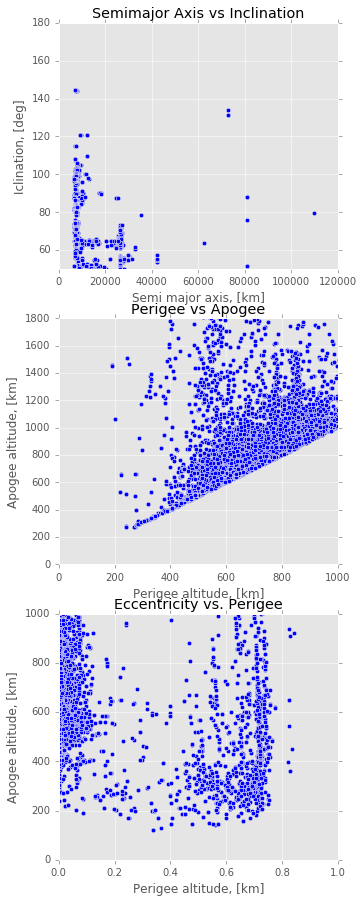

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(5, 15))
ax1.scatter(a,coe[0])
ax1.set_title('Semimajor Axis vs Inclination', )
ax1.set_xlim(0,120000)
ax1.set_ylim(50,180)
ax1.set_xlabel('Semi major axis, [km]')
ax1.set_ylabel('Iclination, [deg]')

ax2.scatter(h_p,h_a)
ax2.set_title('Perigee vs Apogee')
ax2.set_xlim (0,1000)
ax2.set_ylim (0,1800)
ax2.set_xlabel('Perigee altitude, [km]')
ax2.set_ylabel('Apogee altitude, [km]')

ax3.scatter(coe[2],h_p)
ax3.set_title('Eccentricity vs. Perigee')
ax3.set_xlim (0,1)
ax3.set_ylim (0,1000)
ax3.set_xlabel('Perigee altitude, [km]')
ax3.set_ylabel('Apogee altitude, [km]')

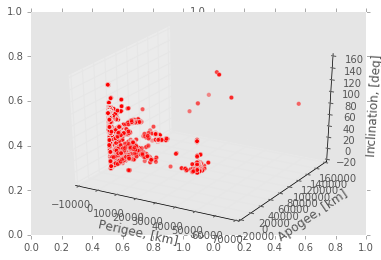

In [37]:
fig, ax1 = plt.subplots(ncols=2, figsize=(6, 4))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(h_p, h_a, coe[0], c='r', marker='o')
ax1.set_xlabel('Perigee, [km]')
ax1.set_ylabel('Apogee, [km]')
ax1.set_zlabel('Inclination, [deg]')



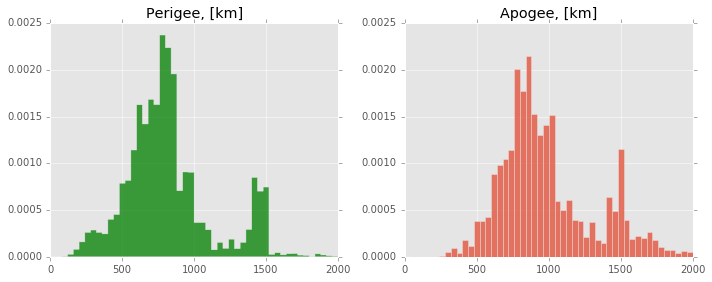

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.hist(h_p, 50, normed=1, range=(0, 2000), histtype='stepfilled', facecolor='g', alpha=0.75)
ax1.set_title('Perigee, [km]')
ax2.hist(h_a, 50, normed=1, range=(0, 2000), histtype='bar',  alpha=0.75)#rwidth=0.8)
ax2.set_title('Apogee, [km]')

plt.tight_layout()